In [1]:
from __future__ import print_function
from pandas.core import datetools
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

/Users/lijianxi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [2]:
df=pd.read_csv('/Users/lijianxi/Downloads/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Data Cleaning

In [4]:
df1=df.drop_duplicates()
df2=df1.dropna()
#Drop the duplication and the rows that contains NULL data
df=df2

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.drop(['id','date','sqft_lot','sqft_above','zipcode', 'sqft_living15', 'sqft_lot15','waterfront','view'],axis=1,inplace=True)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,3.409430,7.656873,291.509045,1971.005136,84.402258,47.560053,-122.213896
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.650743,1.175459,442.575043,29.373411,401.679240,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,1.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,3.000000,7.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,5.000000,13.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000


Desity Plot

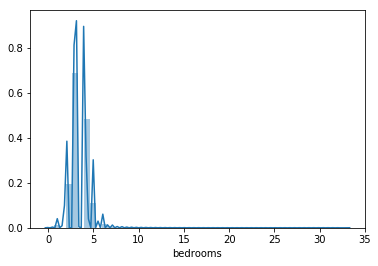

In [8]:
sns.distplot(df['bedrooms'])

In [9]:
plt.show()

We can see that most of the house contains less than 8 bedrooms

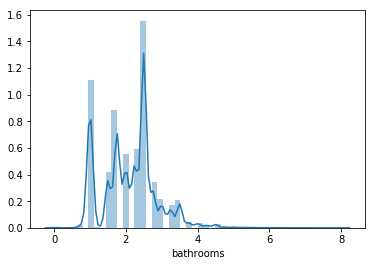

In [10]:
sns.distplot(df['bathrooms'])

In [11]:
plt.show()

We can see that most of the house contains less or equals to that 4 bathrooms

So, begin to removw the outlier data


In [12]:
df2 = df[df.bedrooms < 8]

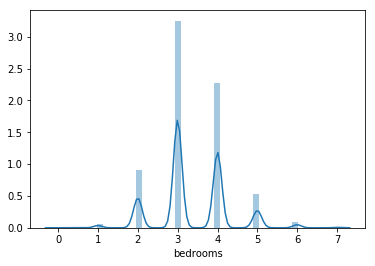

In [13]:
sns.distplot(df2['bedrooms'])

In [14]:
plt.show()

In [15]:
df2 = df2[df2.bathrooms <= 6]

In [16]:
df2=df2[df2.bathrooms >0]

According to the density plot, we can know that most of the house have bathrooms between 0.5 to 4; we just keep the house which the bathroom meet the numbers;
why we exclusive the 0 bathroom: the condition is very different when you cannot use a bathroom at home.

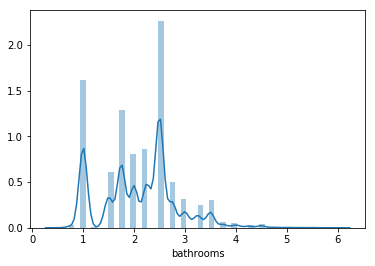

In [17]:
sns.distplot(df2['bathrooms'])

In [18]:
plt.show()

In [19]:
df=df2

In [20]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
count,2.157000e+04,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000,21570.000000
mean,5.383939e+05,3.364256,2.111996,2075.377608,1.493625,3.409736,7.655447,289.982615,1971.025823,84.106537,47.559975,-122.213912
std,3.581984e+05,0.887868,0.760092,903.769262,0.539478,0.650565,1.170109,438.845189,29.359627,401.002682,0.138615,0.140788
min,7.800000e+04,0.000000,0.500000,370.000000,1.000000,1.000000,3.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000
25%,3.210000e+05,3.000000,1.750000,1420.000000,1.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,47.470525,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,3.000000,7.000000,0.000000,1975.000000,0.000000,47.571700,-122.230000
75%,6.433028e+05,4.000000,2.500000,2550.000000,2.000000,4.000000,8.000000,560.000000,1997.000000,0.000000,47.678075,-122.125000
max,7.062500e+06,7.000000,6.000000,10040.000000,3.500000,5.000000,13.000000,3500.000000,2015.000000,2015.000000,47.777600,-121.315000


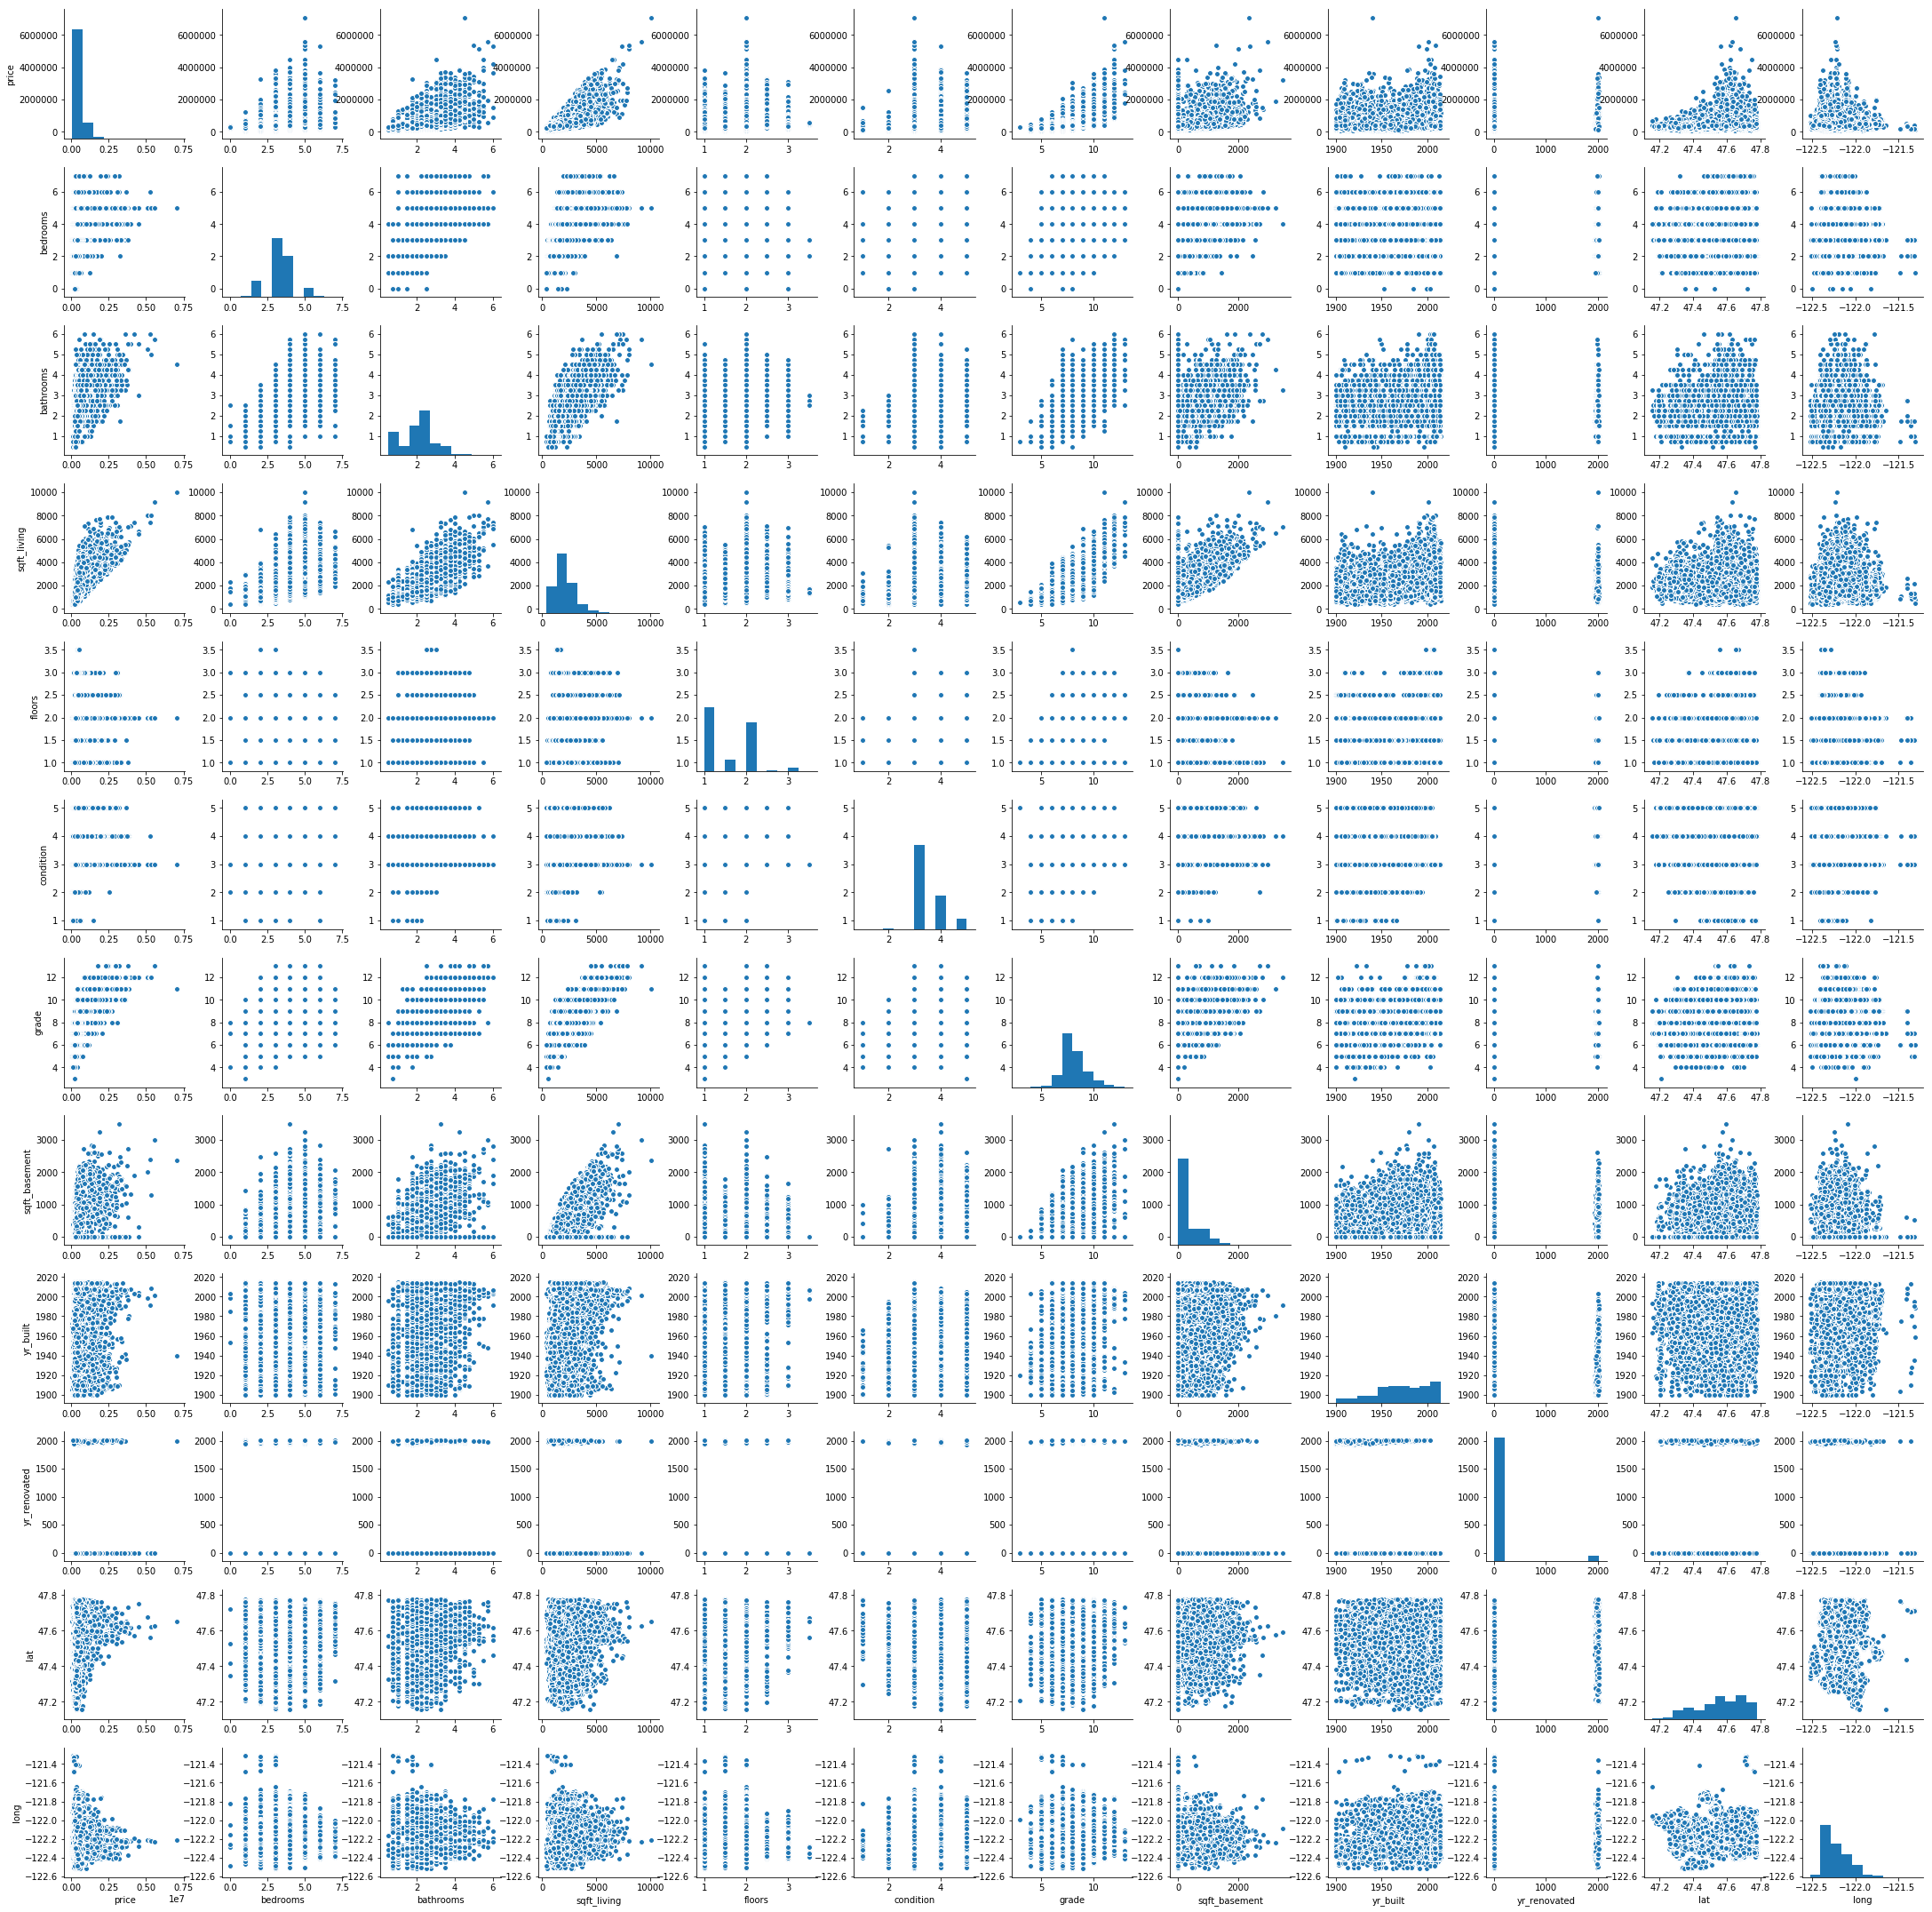

In [21]:
sns.pairplot(df2)

In [22]:
plt.show()

At first we need to do the cluster, and I am going to use K-means and DBSCAN to clustering the data.

In [23]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

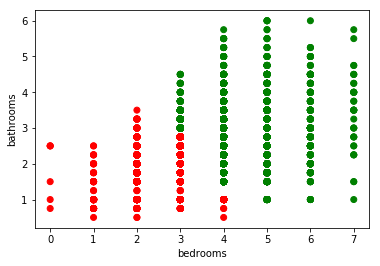

In [24]:
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
estimator = KMeans(n_clusters=2)
X = df[["bedrooms", "bathrooms"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)
#Cluster by K-means
colors = set_colors(labels)
plt.scatter(df["bedrooms"], df["bathrooms"], c=colors)
plt.xlabel("bedrooms")
plt.ylabel("bathrooms")
plt.show()

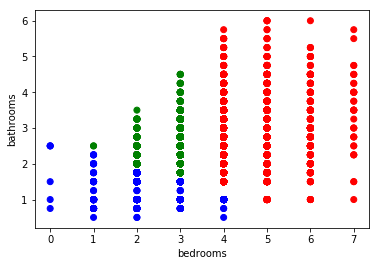

In [25]:
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
estimator = KMeans(n_clusters=3)
X = df[["bedrooms", "bathrooms"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)
#Cluster by K-means
colors = set_colors(labels)
plt.scatter(df["bedrooms"], df["bathrooms"], c=colors)
plt.xlabel("bedrooms")
plt.ylabel("bathrooms")
plt.show()

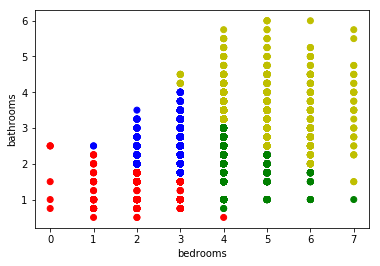

In [26]:
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
estimator = KMeans(n_clusters=4)
X = df[["bedrooms", "bathrooms"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)
#Cluster by K-means
colors = set_colors(labels)
plt.scatter(df["bedrooms"], df["bathrooms"], c=colors)
plt.xlabel("bedrooms")
plt.ylabel("bathrooms")
plt.show()

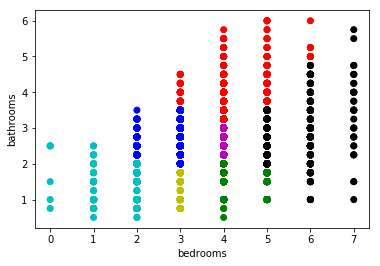

In [27]:
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
estimator = KMeans(n_clusters=7)
X = df[["bedrooms", "bathrooms"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)
#Cluster by K-means
colors = set_colors(labels)
plt.scatter(df["bedrooms"], df["bathrooms"], c=colors)
plt.xlabel("bedrooms")
plt.ylabel("bathrooms")
plt.show()

I have tried to cluster the house by the number of bedrooms conpare to the number of bathroom, 
for K=3,4,5. And we can see the cluster seem to make sense.

For example, when k=5, we can see some kind of the house.


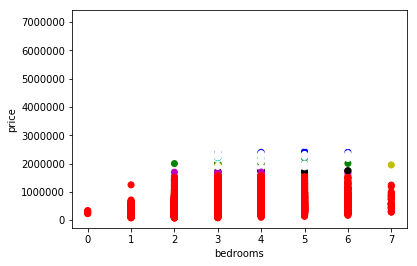

In [28]:
#eps--> radiation , minSample--> the minimum point near the original one
estimator = DBSCAN(eps=10000, min_samples=10)
X = df[["bedrooms", "price"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)

colors = set_colors(labels)
plt.scatter(df["bedrooms"], df["price"], c=colors)
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

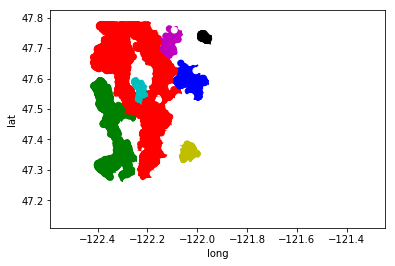

In [29]:
#eps--> radiation , minSample--> the minimum point near the original one
estimator = DBSCAN(eps=0.007, min_samples=10)
X = df[["long", "lat"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)

colors = set_colors(labels)
plt.scatter(df["long"], df["lat"], c=colors)
plt.xlabel("long")
plt.ylabel("lat")
plt.show()

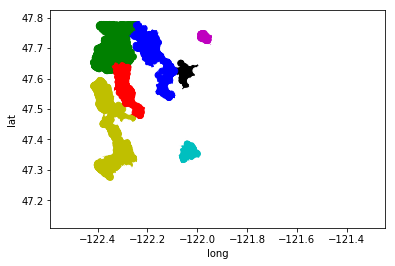

In [30]:
#eps--> radiation , minSample--> the minimum point near the original one
estimator = DBSCAN(eps=0.006, min_samples=10)
X = df[["long", "lat"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)

colors = set_colors(labels)
plt.scatter(df["long"], df["lat"], c=colors)
plt.xlabel("long")
plt.ylabel("lat")
plt.show()

We can see that the scaling effect the cluster. In this point, I show the geography information, and use the DBCSAN to cluster the house's location.  
The eps means the radiation from one point, so we can see a bunch of house if their location is close. 

And then I will use the K-means to show the cluster the house by their geolocation. 

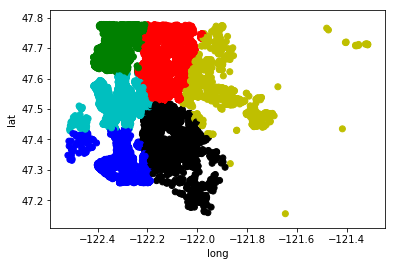

In [31]:
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
estimator = KMeans(n_clusters=6)
X = df[["long", "lat"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)

colors = set_colors(labels)
plt.scatter(df["long"], df["lat"], c=colors)
plt.xlabel("long")
plt.ylabel("lat")
plt.show()

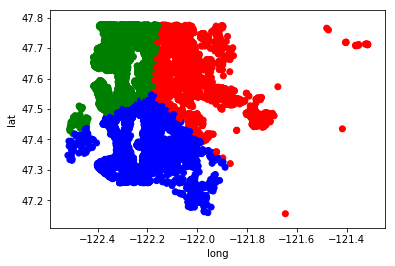

In [32]:
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
estimator = KMeans(n_clusters=3)
X = df[["long", "lat"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)

colors = set_colors(labels)
plt.scatter(df["long"], df["lat"], c=colors)
plt.xlabel("long")
plt.ylabel("lat")
plt.show()

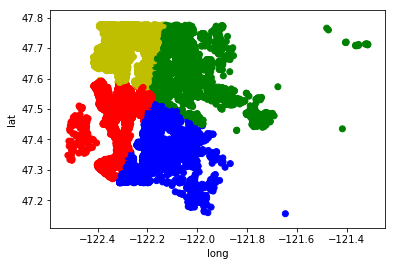

In [33]:
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
estimator = KMeans(n_clusters=4)
X = df[["long", "lat"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)

colors = set_colors(labels)
plt.scatter(df["long"], df["lat"], c=colors)
plt.xlabel("long")
plt.ylabel("lat")
plt.show()

Ansewer to the first Question: 
1.Different clustering method generate different clusters.
2.Yes, the Scaling effect the cluster.
   in K-means: the number of K will decide how many parts of the clusters will be generated
   in DBSCAN, the EPS and the MINI-Sample will decide the clusters.
3.By clustering the dataplot of the geology data, we can see the cluster of the house and we can divide them into many parts according to their location. 


And in the bedrooms-bathrooms plot, the K-means method divide them into 
one bedroom to one bathroom
one bedroom to many bathroom 
many bedroom to one bathroom

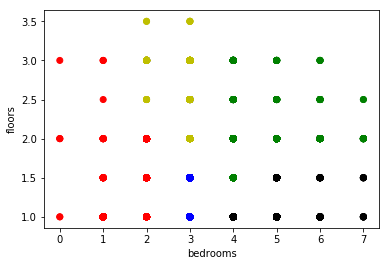

In [34]:
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
estimator = KMeans(n_clusters=5)
X = df[["bedrooms", "floors"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)
#Cluster by K-means
colors = set_colors(labels)
plt.scatter(df["bedrooms"], df["floors"], c=colors)
plt.xlabel("bedrooms")
plt.ylabel("floors")
plt.show()

Using the K-means to cluster the points, it can be devided into some interesting groups. 
The red one means it's a house have one floor and have many bedrooms.
while the blue one show's the bedrooms seperated 


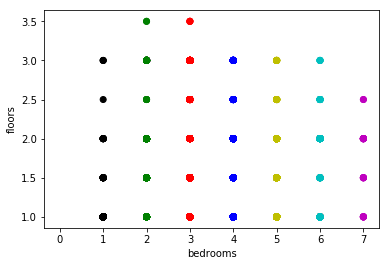

In [35]:
#eps--> radiation , minSample--> the minimum point near the original one
estimator = DBSCAN(eps=0.5, min_samples=5)
X = df[["bedrooms", "floors"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
Counter(labels)

colors = set_colors(labels)
plt.scatter(df["bedrooms"], df["floors"], c=colors)
plt.xlabel("bedrooms")
plt.ylabel("floors")
plt.show()

when using the DBSCAN to clustering the plot of floors, it did not make any reality sense.
However, if we use the K-means clustring fuction: we can see some interesting clusters.


2. Generate a linear model for the data

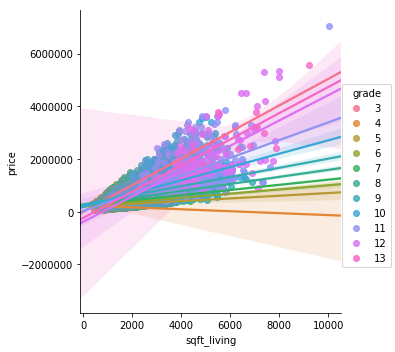

In [36]:
sns.lmplot(x="sqft_living", y="price", hue="grade", data=df)

In [37]:
plt.show()

From this plot we find that there seem like some coef, but it varies from the grade;
And we begin to analysis in math.

Here begins the linear model regression.

In [38]:
 from sklearn import linear_model

X = df[["sqft_living"]]
y = df[["price"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-34450.4570669] [[ 276.01931957]]


It means that the price=276*sqft_living-34450+error

In [39]:
import statsmodels.api as sm
# Note the swap of X and y
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 1.145e+05
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        21:59:54   Log-Likelihood:            -2.9934e+05
No. Observations:               21570   AIC:                         5.987e+05
Df Residuals:                   21569   BIC:                         5.987e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   262.0657      0.774    338.448      0.000     260.548     263.583
==============================================================================
Omnibus:                    14543.367   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           426611.168
Skew:                           2.830   Prob(JB):                         0.00
Kurtosis:                      24.039   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  sqft_living    262.065697
dtype: float64
R2:  0.841539746983


The r square is well 

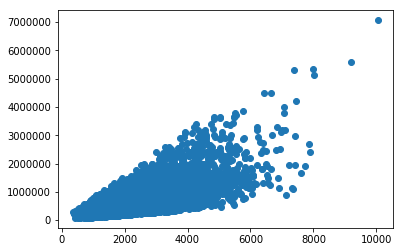

In [41]:
X = df[["sqft_living"]]
y = df[["price"]]
plt.plot(X, y, "o")

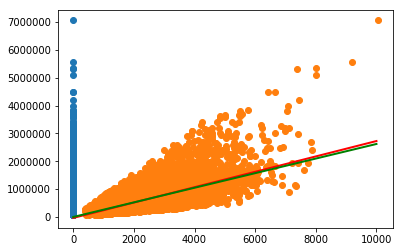

In [55]:
X = sm.add_constant(X) #  Our model needs an intercept so we add a column of 1s:
plt.plot(X, y, "o")
x2 = np.linspace(0, 10000, 20)
y2 = -34450.4570669 + (276.01931957*x2)
plt.plot(x2, y2, lw=2, color="r")
x2 = np.linspace(0, 10000, 50)
y2 = (262.065697*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

In [56]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                 2.031e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:20:10   Log-Likelihood:            -2.9930e+05
No. Observations:               21570   AIC:                         5.986e+05
Df Residuals:                   21568   BIC:                         5.986e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.445e+04   4383.943     -7.858      0.000    -4.3e+04   -2.59e+04
sqft_living   276.0193      1.937    142.520      0.000     272.223     279.815
==============================================================================
Omnibus:                    13651.237   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           356874.235
Skew:                           2.615   Prob(JB):                         0.00
Kurtosis:                      22.228   Cond. No.                     5.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const         -34450.457067
sqft_living      276.019320
dtype: float64
R2:  0.485005702937


Multiple Regression 

In [58]:
model = ols("price ~ bedrooms + sqft_living -1", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 5.886e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:24:41   Log-Likelihood:            -2.9909e+05
No. Observations:               21570   AIC:                         5.982e+05
Df Residuals:                   21568   BIC:                         5.982e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -3.485e+04   1550.854    -22.473      0.000   -3.79e+04   -3.18e+04
sqft_living   312.8019      2.384    131.218      0.000     308.129     317.474
==============================================================================
Omnibus:                    12355.221   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272125.232
Skew:                           2.318   Prob(JB):                         0.00
Kurtosis:                      19.771   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
model = ols("price ~ bedrooms + sqft_living+ bedrooms : sqft_living -1", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.926e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:25:38   Log-Likelihood:            -2.9908e+05
No. Observations:               21570   AIC:                         5.982e+05
Df Residuals:                   21567   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -3.466e+04   1551.649    -22.339      0.000   -3.77e+04   -3.16e+04
sqft_living            323.1407      3.998     80.824      0.000     315.304     330.977
bedrooms:sqft_living    -2.7927      0.867     -3.221      0.001      -4.492      -1.093
==============================================================================
Omnibus:                    12607.671   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           287862.298
Skew:                           2.374   Prob(JB):                         0.00
Kurtosis:                      20.255   Cond. No.                     8.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
model = ols("price ~ bedrooms + sqft_living -1", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 5.886e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        21:48:55   Log-Likelihood:            -2.9909e+05
No. Observations:               21570   AIC:                         5.982e+05
Df Residuals:                   21568   BIC:                         5.982e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -3.485e+04   1550.854    -22.473      0.000   -3.79e+04   -3.18e+04
sqft_living   312.8019      2.384    131.218      0.000     308.129     317.474
==============================================================================
Omnibus:                    12355.221   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           272125.232
Skew:                           2.318   Prob(JB):                         0.00
Kurtosis:                      19.771   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Becasue the P Value is 0, so the relationship is significant.

Multi-colinearity

In [61]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
price,1.000000,0.314348,0.518814,0.696424,0.258061,0.036809,0.670885,0.314780,0.056819,0.121801,0.312620,0.023543
bedrooms,0.314348,1.000000,0.523926,0.594426,0.181255,0.025662,0.370320,0.302386,0.168024,0.016374,-0.014606,0.141484
bathrooms,0.518814,0.523926,1.000000,0.751291,0.504628,-0.126230,0.665834,0.273541,0.514053,0.046909,0.022700,0.228492
sqft_living,0.696424,0.594426,0.751291,1.000000,0.354311,-0.059408,0.764216,0.425401,0.324377,0.050713,0.051026,0.245526
floors,0.258061,0.181255,0.504628,0.354311,1.000000,-0.264751,0.458498,-0.251145,0.491463,0.005767,0.048898,0.126568
condition,0.036809,0.025662,-0.126230,-0.059408,-0.264751,1.000000,-0.146954,0.175966,-0.361750,-0.060581,-0.014957,-0.105844
grade,0.670885,0.370320,0.665834,0.764216,0.458498,-0.146954,1.000000,0.162215,0.449587,0.011882,0.113538,0.201162
sqft_basement,0.314780,0.302386,0.273541,0.425401,-0.251145,0.175966,0.162215,1.000000,-0.133160,0.067065,0.109767,-0.145298
yr_built,0.056819,0.168024,0.514053,0.324377,0.491463,-0.361750,0.449587,-0.133160,1.000000,-0.224665,-0.148154,0.409574
yr_renovated,0.121801,0.016374,0.046909,0.050713,0.005767,-0.060581,0.011882,0.067065,-0.224665,1.000000,0.029057,-0.067821


Validation

In [43]:
sns.jointplot(x='price',y='sqft_living',data=df,kind='reg')

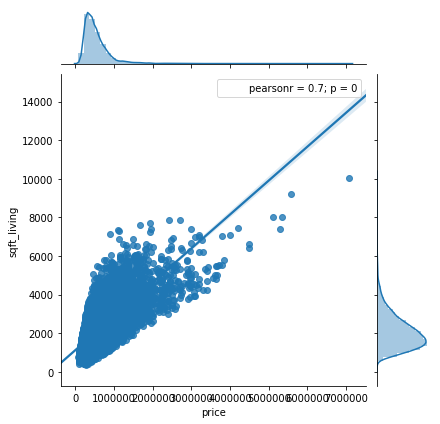

In [44]:
plt.show()

In [45]:
sns.jointplot(x='grade',y='price',data=df, kind='reg')

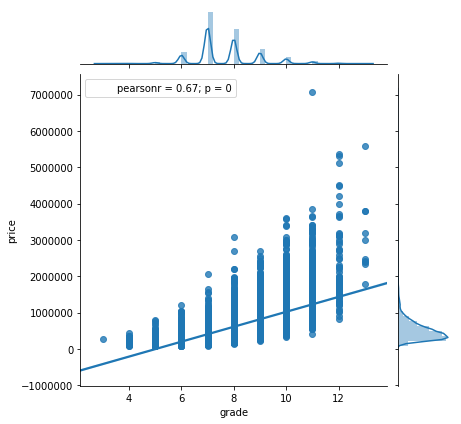

In [46]:
plt.show()

In [47]:
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

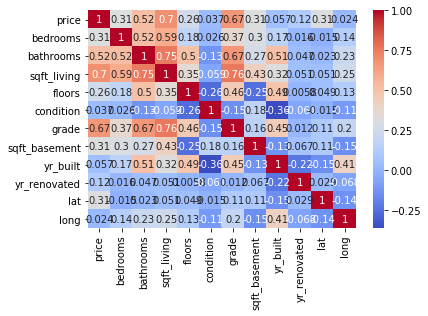

In [48]:
plt.show()

From the correlation table and heatmap we can see that few variables are highly correlated, like bathroom, sqft_living and grade. Yearbuild is also highly negatively corelated with condition too.

In [49]:
#Let's check the distribution plot of price value 
sns.distplot(df['price'],bins = 20)

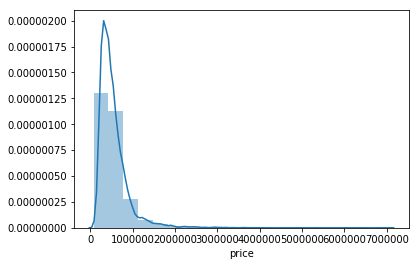

In [50]:
plt.show()

In [51]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
price,1.000000,0.314348,0.518814,0.696424,0.258061,0.036809,0.670885,0.314780,0.056819,0.121801,0.312620,0.023543
bedrooms,0.314348,1.000000,0.523926,0.594426,0.181255,0.025662,0.370320,0.302386,0.168024,0.016374,-0.014606,0.141484
bathrooms,0.518814,0.523926,1.000000,0.751291,0.504628,-0.126230,0.665834,0.273541,0.514053,0.046909,0.022700,0.228492
sqft_living,0.696424,0.594426,0.751291,1.000000,0.354311,-0.059408,0.764216,0.425401,0.324377,0.050713,0.051026,0.245526
floors,0.258061,0.181255,0.504628,0.354311,1.000000,-0.264751,0.458498,-0.251145,0.491463,0.005767,0.048898,0.126568
condition,0.036809,0.025662,-0.126230,-0.059408,-0.264751,1.000000,-0.146954,0.175966,-0.361750,-0.060581,-0.014957,-0.105844
grade,0.670885,0.370320,0.665834,0.764216,0.458498,-0.146954,1.000000,0.162215,0.449587,0.011882,0.113538,0.201162
sqft_basement,0.314780,0.302386,0.273541,0.425401,-0.251145,0.175966,0.162215,1.000000,-0.133160,0.067065,0.109767,-0.145298
yr_built,0.056819,0.168024,0.514053,0.324377,0.491463,-0.361750,0.449587,-0.133160,1.000000,-0.224665,-0.148154,0.409574
yr_renovated,0.121801,0.016374,0.046909,0.050713,0.005767,-0.060581,0.011882,0.067065,-0.224665,1.000000,0.029057,-0.067821


From the correlation table and heatmap we can see that few variables are highly correlated, like bathroom, sqft_living and grade. Yearbuild is also highly negatively corelated with condition too.

In [57]:
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 10)

/Users/lijianxi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [64]:
import numpy as np # NumPy is the fundamental package for scientific computing

import pandas as pd # Pandas is an easy-to-use data structures and data analysis tools
pd.set_option('display.max_columns', None) # To display all columns

import matplotlib.pyplot as plt # Matplotlib is a python 2D plotting library
%matplotlib inline 
# A magic command that tells matplotlib to render figures as static images in the Notebook.

import seaborn as sns # Seaborn is a visualization library based on matplotlib (attractive statistical graphics).
sns.set_style('whitegrid') # One of the five seaborn themes
import warnings
warnings.filterwarnings('ignore') # To ignore some of seaborn warning msg

from scipy import stats

from sklearn import linear_model # Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors

from math import log

Simple Linear regression

In [65]:
import numpy as np
# A function that take one input of the dataset and return the RMSE (of the test data), and the intercept and coefficient
def simple_linear_model(train, test, input_feature):
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train.as_matrix(columns = [input_feature]), train.as_matrix(columns = ['price'])) # Train the model
    RMSE = mean_squared_error(test.as_matrix(columns = ['price']), 
                              regr.predict(test.as_matrix(columns = [input_feature])))**0.5 # Calculate the RMSE on test data
    return RMSE, regr.intercept_[0], regr.coef_[0][0]

In [66]:
RMSE, w0, w1 = simple_linear_model(train_data, test_data, 'sqft_living')
print ('RMSE for sqft_living is: %s ' %RMSE)
print ('intercept is: %s' %w0)
print ('coefficient is: %s' %w1)

RMSE for sqft_living is: 259755.57027 
intercept is: -31561.5188132
coefficient is: 274.168992512


In [72]:
input_list = df.columns.values.tolist() # list of column name
input_list.remove('price')
simple_linear_result = pd.DataFrame(columns = ['feature', 'RMSE', 'intercept', 'coefficient'])

# loop that calculate the RMSE of the test data for each input 
for p in input_list:
    RMSE, w1, w0 = simple_linear_model(train_data, test_data, p)
    simple_linear_result = simple_linear_result.append({'feature':p, 'RMSE':RMSE, 'intercept':w0, 'coefficient': w1}
                                                       ,ignore_index=True)
simple_linear_result.sort_values('RMSE').head(5) # display the 5 best estimators

,feature,RMSE,intercept,coefficient
2,sqft_living,259755.570270,274.168993,-3.156152e+04
5,grade,269861.158619,204788.185708,-1.030550e+06
1,bathrooms,312505.139369,244633.935564,2.198203e+04
9,lat,344954.092140,799382.346669,-3.748073e+07
0,bedrooms,347155.625945,128211.560053,1.063715e+05


In [71]:
simple_linear_result.sort_values('RMSE').tail(5) # display the 5 least estimators

,feature,RMSE,intercept,coefficient
3,floors,351099.722816,169478.154401,2.844187e+05
8,yr_renovated,361247.802669,108.143208,5.284626e+05
7,yr_built,363137.833286,658.262931,-7.597870e+05
10,long,363834.525419,60631.886892,7.947695e+06
4,condition,363861.398487,22043.982852,4.624375e+05


Multiple Linear Regression


In [74]:
# A function that take multiple features as input and return the RMSE (of the test data), and the  intercept and coefficients
def multiple_regression_model(train, test, input_features):
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train.as_matrix(columns = input_features), train.as_matrix(columns = ['price'])) # Train the model
    RMSE = mean_squared_error(test.as_matrix(columns = ['price']), 
                              regr.predict(test.as_matrix(columns = input_features)))**0.5 # Calculate the RMSE on test data
    return RMSE, regr.intercept_[0], regr.coef_

In [75]:
print ('RMSE: %s, intercept: %s, coefficients: %s' %multiple_regression_model(train_data, 
                                                                             test_data, ['sqft_living','bathrooms','bedrooms']))

print ('RMSE: %s, intercept: %s, coefficients: %s' %multiple_regression_model(train_data, 
                                                                             test_data, ['bathrooms','bedrooms']))


RMSE: 254979.054279, intercept: 93405.6703631, coefficients: [[   304.20149615   9135.22245883 -61413.18047727]]
RMSE: 312189.878921, intercept: -29509.3853723, coefficients: [[ 229430.18768137   24835.68916144]]


Logistic Regression
